<a href="https://colab.research.google.com/github/ser-art/RAE-vs-AE/blob/master/AE_vs_RAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers

import tqdm
import tensorflow as tf

# Build and fit models


In [130]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 22.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Some helpful functions 

In [0]:
from keras.losses import binary_crossentropy, mean_squared_error
from keras import backend as K

def L(X, X_, t):
  if t == 'binary':
    return binary_crossentropy(X, X_)
  return mean_squared_error(X, X_)

def R(X):
  return K.dot(X, K.transpose(X))

def tau(X, t):
  return tf.where(X < t, X, tf.zeros(tf.shape(X)))

def rae_loss(alpha, t, L_type='binary'):
  def rae(y_true, y_pred):
    return (1 - alpha)*L(y_true, y_pred, L_type) + alpha*L(tau(R(y_true), t), tau(R(y_pred), t), L_type)
  return rae

In [0]:
def plot_digits(n, X, decoded_X):
    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Simple AE

In [0]:
from keras.datasets import fashion_mnist as fmnist # import fashion mnist dataset 

In [0]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

In [0]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [98]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [0]:
inputs = Input(shape=(28*28,))

encoded = Dense(units=128, activation='relu')(inputs)

encoded = Dense(units=64, activation='relu')(encoded)

encoded = Dense(units=2, activation='relu')(encoded)

decoded = Dense(units=64, activation='relu')(encoded)

decoded = Dense(units=128, activation='relu')(decoded)

decoded = Dense(units=28*28, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [101]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_74 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_75 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_76 (Dense)             (None, 784)               101136    
Total para

## RAE autoencoder (when alpha equals 0 then is just simple AE - first iteration)

Alpha 0.0
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 37s 613us/step - loss: 0.3128 - val_loss: 0.3159
Epoch 2/2
60000/60000 [==============================] - 16s 270us/step - loss: 0.3109 - val_loss: 0.3158
0.3158070791721344


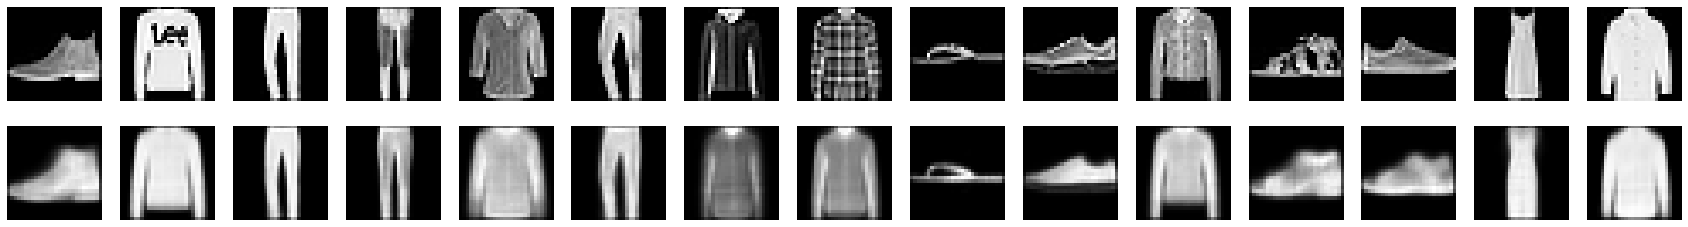

 
Alpha 0.07142857142857142
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 37s 615us/step - loss: 0.2898 - val_loss: 0.2933
Epoch 2/2
60000/60000 [==============================] - 16s 268us/step - loss: 0.2887 - val_loss: 0.2933
0.2932603261470795


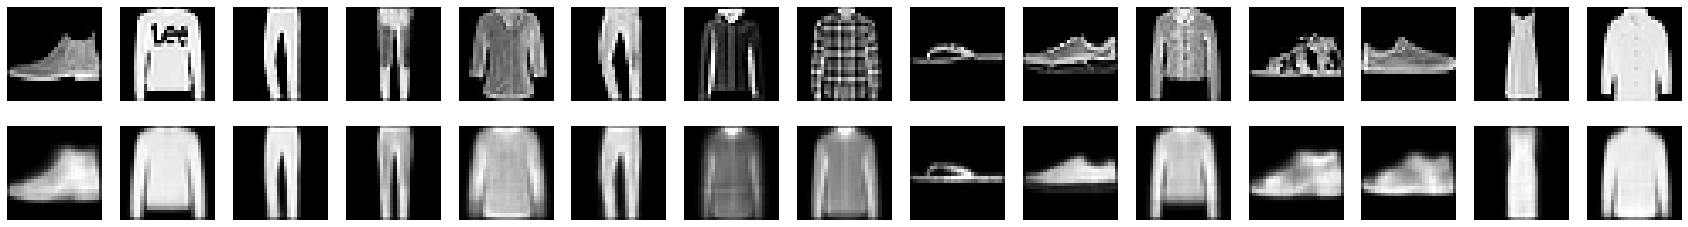

 
Alpha 0.14285714285714285
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 37s 623us/step - loss: 0.2675 - val_loss: 0.2705
Epoch 2/2
60000/60000 [==============================] - 16s 271us/step - loss: 0.2663 - val_loss: 0.2706
0.2705713985443115


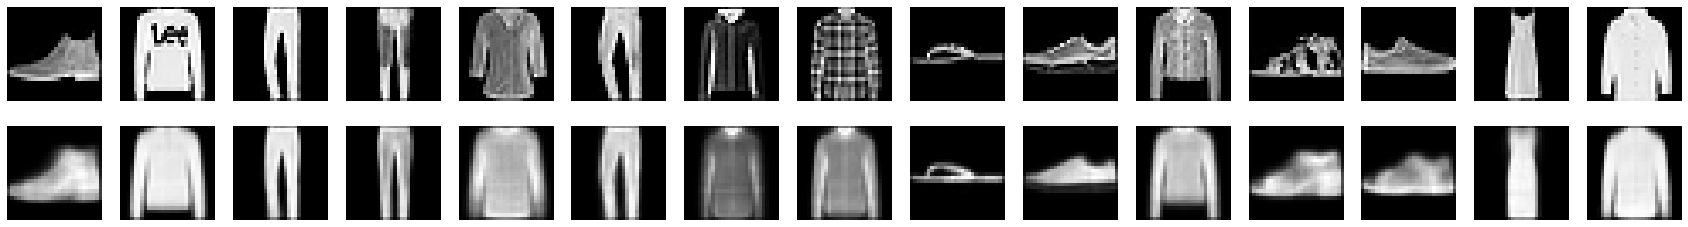

 
Alpha 0.21428571428571427
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 651us/step - loss: 0.2448 - val_loss: 0.2480
Epoch 2/2
60000/60000 [==============================] - 17s 278us/step - loss: 0.2442 - val_loss: 0.2483
0.24826884069442748


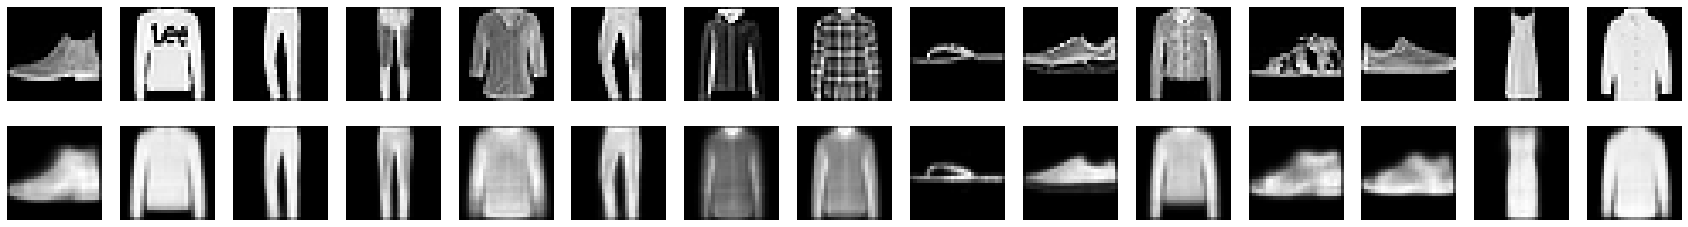

 
Alpha 0.2857142857142857
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 37s 624us/step - loss: 0.2233 - val_loss: 0.2255
Epoch 2/2
60000/60000 [==============================] - 16s 269us/step - loss: 0.2219 - val_loss: 0.2255
0.22553269305229187


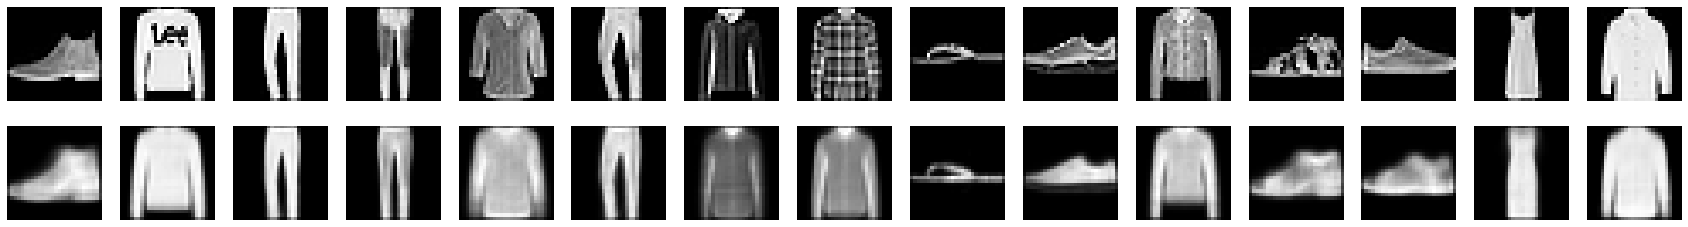

 
Alpha 0.3571428571428571
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 38s 631us/step - loss: 0.2006 - val_loss: 0.2030
Epoch 2/2
60000/60000 [==============================] - 16s 271us/step - loss: 0.1999 - val_loss: 0.2030
0.2030195302963257


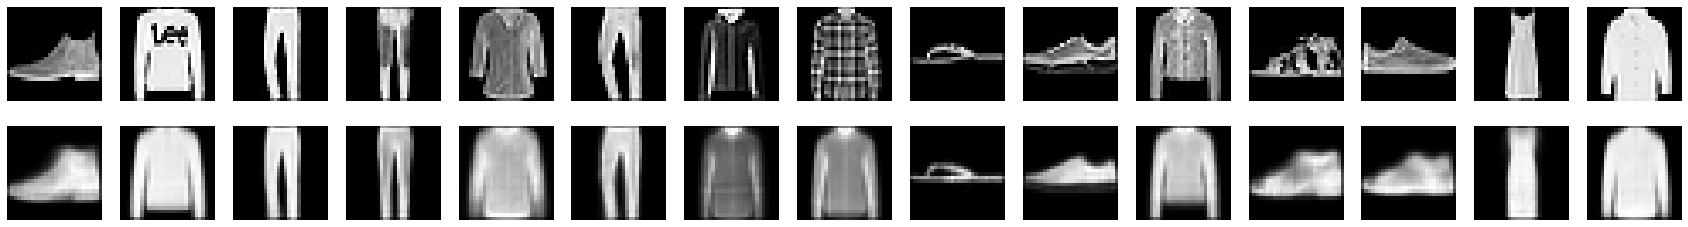

 
Alpha 0.42857142857142855
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 38s 637us/step - loss: 0.1783 - val_loss: 0.1804
Epoch 2/2
60000/60000 [==============================] - 16s 274us/step - loss: 0.1776 - val_loss: 0.1805
0.18050339086055756


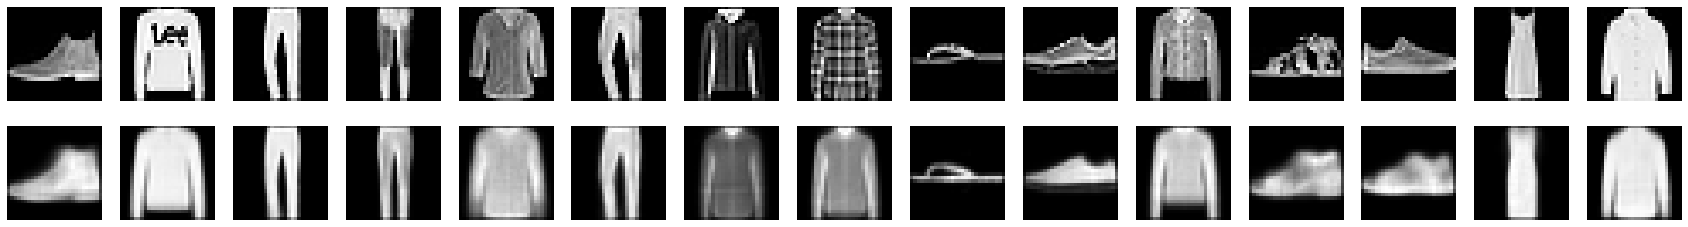

 
Alpha 0.5
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 656us/step - loss: 0.1560 - val_loss: 0.1580
Epoch 2/2
60000/60000 [==============================] - 17s 279us/step - loss: 0.1555 - val_loss: 0.1580
0.15798291010856627


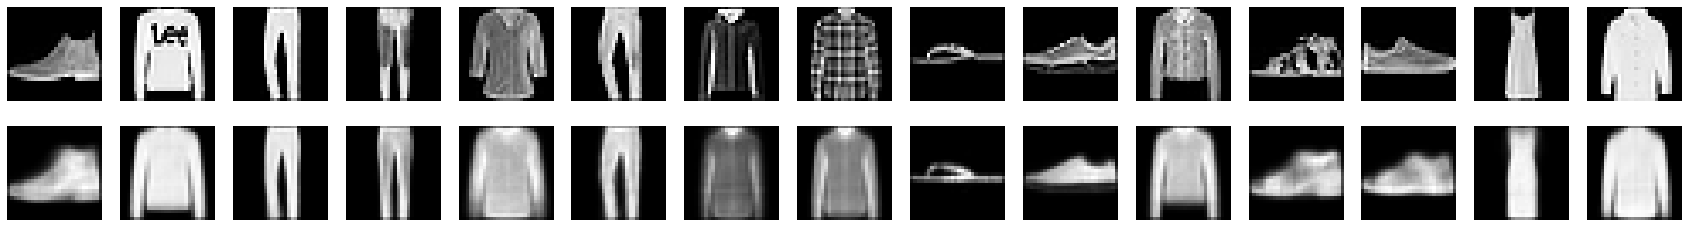

 
Alpha 0.5714285714285714
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 657us/step - loss: 0.1337 - val_loss: 0.1354
Epoch 2/2
60000/60000 [==============================] - 16s 270us/step - loss: 0.1332 - val_loss: 0.1354
0.13540742683410645


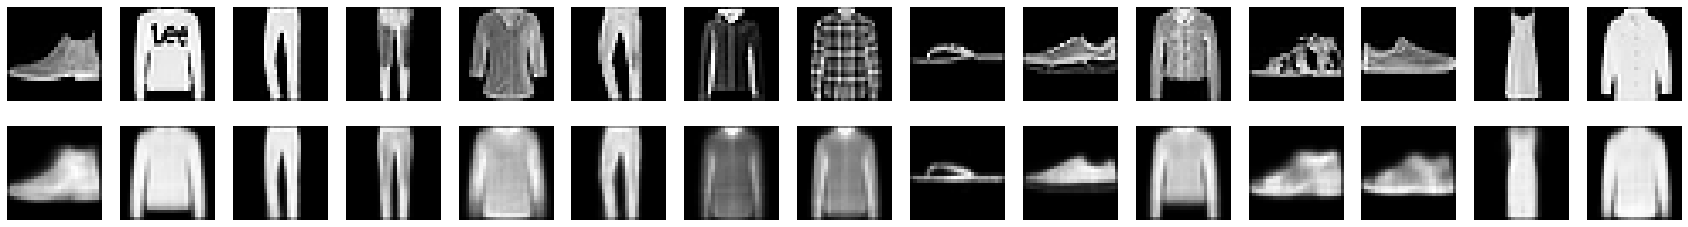

 
Alpha 0.6428571428571428
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 648us/step - loss: 0.1115 - val_loss: 0.1128
Epoch 2/2
60000/60000 [==============================] - 16s 270us/step - loss: 0.1110 - val_loss: 0.1128
0.11282267847061157


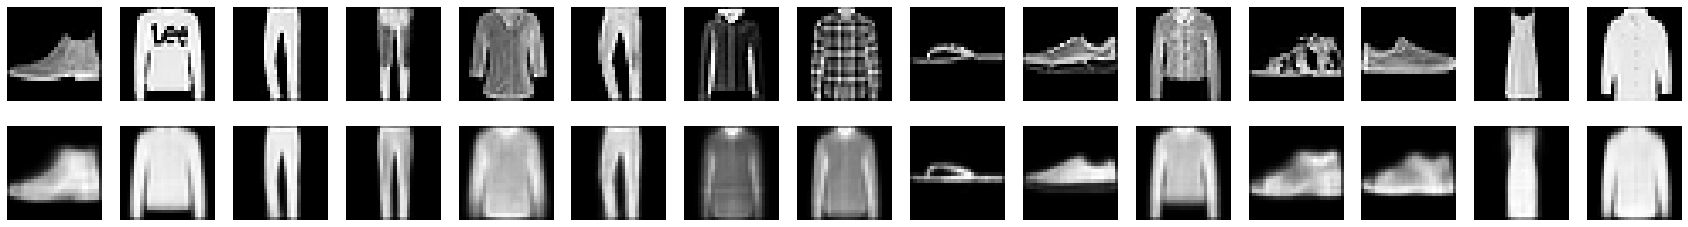

 
Alpha 0.7142857142857142
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 650us/step - loss: 0.0891 - val_loss: 0.0903
Epoch 2/2
60000/60000 [==============================] - 16s 269us/step - loss: 0.0888 - val_loss: 0.0903
0.09031983233690262


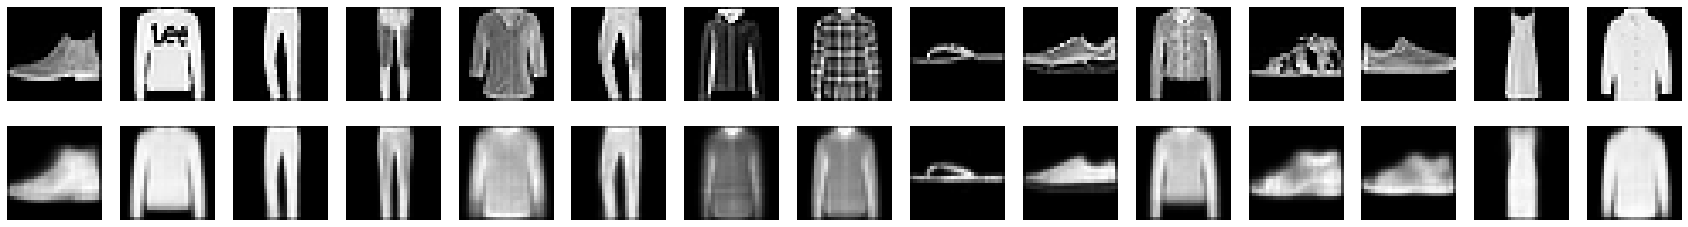

 
Alpha 0.7857142857142857
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 39s 652us/step - loss: 0.0668 - val_loss: 0.0678
Epoch 2/2
60000/60000 [==============================] - 16s 273us/step - loss: 0.0667 - val_loss: 0.0678
0.06778038237094879


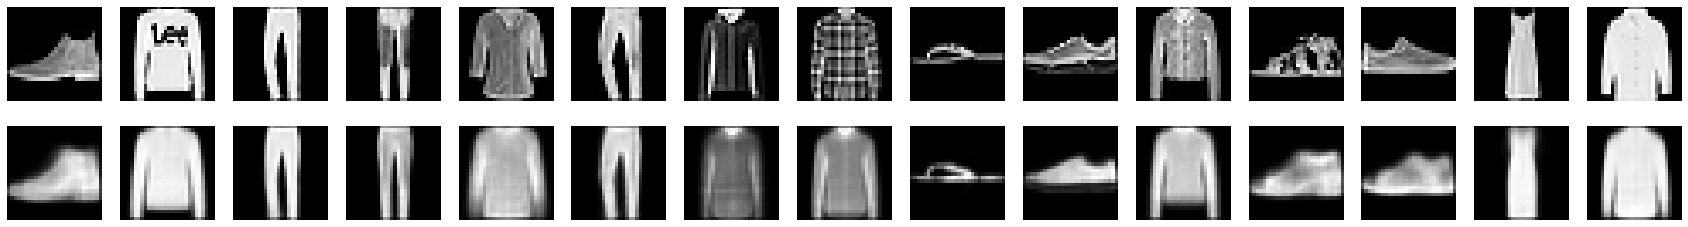

 
Alpha 0.8571428571428571
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 41s 676us/step - loss: 0.0447 - val_loss: 0.0452
Epoch 2/2
60000/60000 [==============================] - 16s 274us/step - loss: 0.0445 - val_loss: 0.0452
0.045222126823663715


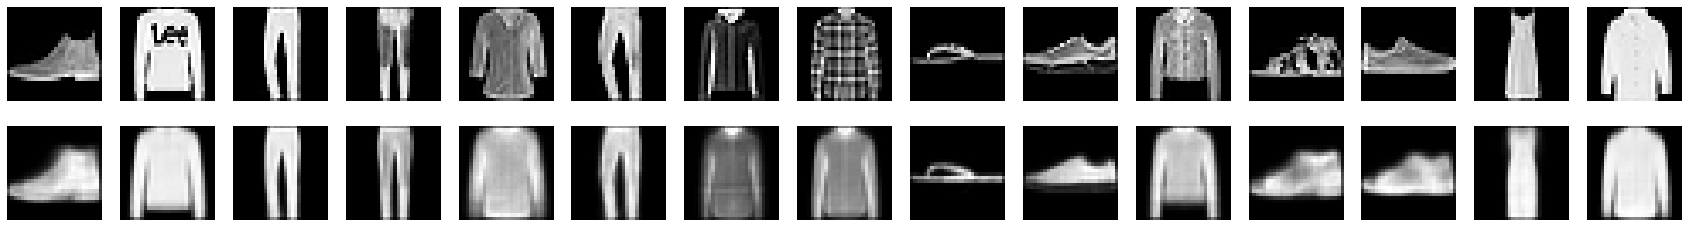

 
Alpha 0.9285714285714285
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 40s 669us/step - loss: 0.0224 - val_loss: 0.0227
Epoch 2/2
60000/60000 [==============================] - 16s 271us/step - loss: 0.1117 - val_loss: 0.3062
0.3062361792087555


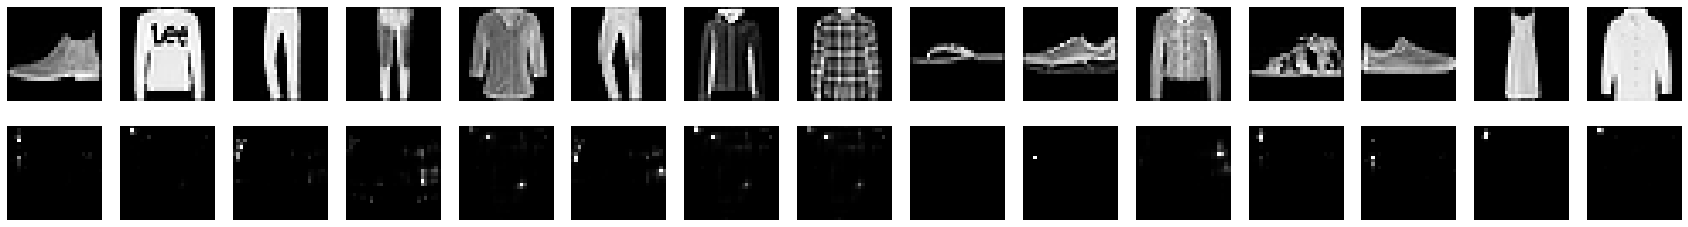

 
Alpha 1.0
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 40s 670us/step - loss: 1.3241e-04 - val_loss: 1.6849e-04
Epoch 2/2
60000/60000 [==============================] - 16s 268us/step - loss: 1.1992e-04 - val_loss: 1.6851e-04
0.0001685107577657618


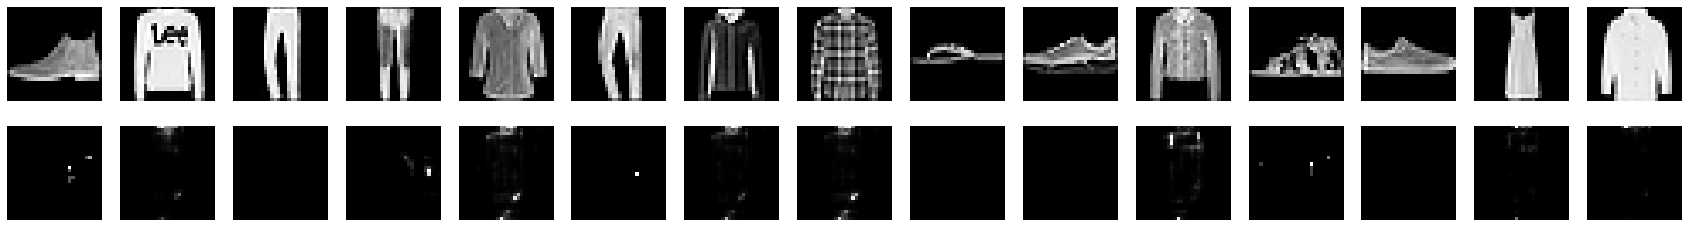

In [120]:
alphas = np.linspace(0, 1, 15)
t = 1
losses = []

for alpha in alphas:
    loss = rae_loss(alpha, t, 'binary')
    autoencoder.compile(optimizer='adam', loss=loss)
    
    print('Alpha {}'.format(alpha))
    
    h = autoencoder.fit(X_train, X_train,
                    epochs=2,
                    batch_size=1024,
                    shuffle=True, 
                    validation_data=(X_test, X_test))
    
    losses.append(h.history['val_loss'][-1])
    print(h.history['val_loss'][-1])
    
    plot_digits(15, X_test, autoencoder.predict(X_test))
    print(' ')

# Visualization 

## Alpha curse

In [0]:
curve_data = pd.DataFrame()
curve_data['alpha'] = alphas
curve_data['loss'] = losses

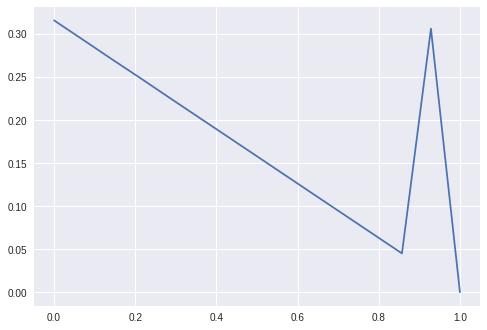

In [132]:
plt.plot(alphas, losses)

In [0]:
m = models[np.argmin(losses[:len(losses) - 1])]

In [0]:
m = models[5]

In [0]:
encoded = K.function([m.layers[0].input],
                     [m.layers[3].output])

## 2d plane 

In [0]:
ae_encode = pd.DataFrame()
encode = encoded([X_test])[0]
ae_encode['X'] = encode[:,0]
ae_encode['Y'] = encode[:,1]

In [0]:
ae_encode['type'] = y_test

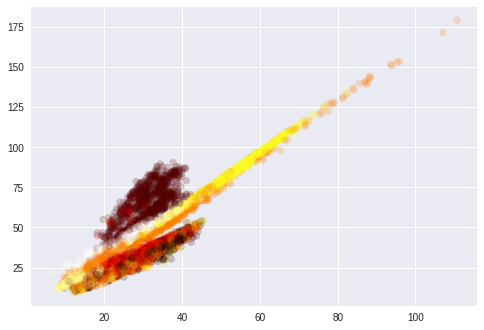

In [159]:
plt.scatter(ae_encode['X'], ae_encode['Y'], c=ae_encode['type'], alpha=0.2, cmap='hot')
plt.show()